<a href="https://colab.research.google.com/github/andipasti/smupo/blob/main/Kopie_von_Leeds_MT_Classic_LLM_openai_working_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os



# Now you can proceed with your code that requires this environment variable

from google.colab import userdata
os.environ['HUGGINGFACE_TOKEN'] = userdata.get('HUGGINGFACE_TOKEN')

In [3]:
import pandas as pd
# Loading the dataset from a JSON file
df = pd.read_json('./drive/Othercomputers/X1/code/datas.json')
display(df)

,issue_id,issue_title,issue_description,journal_id,journal_created_on,journal_notes,journal_author
0,116550,[MBA#1127156] Layout-Anpassung auf Typo 3 - We...,Guten Morgen\r\n\r\nIch habe eine eher speziel...,266857,2024-03-25 10:02:24,Bist du da dran?,0
1,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266862,2024-03-25 10:28:33,> PS: Weiss man was das Problem war? LG Andrea...,0
2,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266861,2024-03-25 10:17:20,KRW Andreas Berger\r\nKSL Cseri Laszlo\r\n\r\n...,0
3,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266851,2024-03-25 09:49:46,Super danke :-)\r\n\r\nTest Servicedesk erfolg...,0
4,116543,[MBA#1128940] Zimbra Störung komplette Schule:...,Guten Morgen allerseits\r\n\r\nSchule: KSLZH\r...,266847,2024-03-25 09:40:21,"Die Warteschlangen werden nun abgebaut, das Sy...",0
...,...,...,...,...,...,...,...
995,116165,KEN: Module freischalten [MBA#1127666],"- Basis (AP 001)\r\n- Basis+ (AP 002) MATAR, I...",265988,2024-03-04 13:35:30,* Basis (AP 001) *ok*\r\n* Basis+ (AP 002)\r\n...,0
996,116165,KEN: Module freischalten [MBA#1127666],"- Basis (AP 001)\r\n- Basis+ (AP 002) MATAR, I...",264323,2024-02-02 15:04:40,* Basis (AP 001)\n* Basis+ (AP 002)\n** MATAR ...,0
997,116164,KEN: Signage einrichten,Bitte einen Beispiel-Raspi startklar machen,266525,2024-03-13 16:23:45,Raspi aufgesetzt und mit KEN verbunden.,0
998,116163,KEN: mobile App aufschalten,Einfach mal alle Module freischalten,264890,2024-02-13 13:35:56,"Super, der Benutzer wechsel klappt nun auch.\r...",0


In [5]:
column_names = list(df.columns)
print(column_names)

['issue_id', 'issue_title', 'issue_description', 'journal_id', 'journal_created_on', 'journal_notes', 'journal_author']


In [6]:
df.drop(['journal_id', 'journal_created_on', 'journal_author'], axis=1, inplace=True)


In [7]:
import pandas as pd

df_merged = df.groupby(['issue_id', 'issue_title', 'issue_description'])['journal_notes'].apply(lambda notes: '\n---\n'.join(notes)).reset_index()

df_merged.rename(columns={'journal_notes': 'merged_journal_notes'}, inplace=True)



In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame
# First, convert all relevant columns to string type to avoid any concatenation issues
df = df.astype(str)

# Now, group by 'issue_id' and concatenate all information into a single cell
df_merged = df.groupby('issue_id').apply(lambda x: x['issue_title'].iloc[0] + '\n---\n' +
                                         x['issue_description'].iloc[0] + '\n---\n' +
                                         '\n---\n'.join(x['journal_notes'])).reset_index(name='all_information')

df_merged

,issue_id,all_information
0,116163,KEN: mobile App aufschalten\n---\nEinfach mal ...
1,116164,KEN: Signage einrichten\n---\nBitte einen Beis...
2,116165,KEN: Module freischalten [MBA#1127666]\n---\n-...
3,116166,KST [MBA#1125513] - IN2 - Blöcke streichen/lös...
4,116167,KZI [MBA#1125671] - IN2 - IU-Stundenplan - bus...
...,...,...
251,116537,KZN [MBA#1128871] IM: Neues gemischtes Profil ...
252,116538,Fwd: [MBA#1128639] AW: Druckereinstellungen Se...
253,116539,KZI Miniinfo Neue Common Name Prozedur für Kur...
254,116543,[MBA#1128940] Zimbra Störung komplette Schule:...


In [9]:
column_names = list(df_merged.columns)
print(column_names)


['issue_id', 'all_information']


In [10]:
# Set Pandas display options to show the full content of 'merged_journal_notes'
pd.set_option('display.max_colwidth', None)

df = df_merged
df

,issue_id,all_information
0,116163,"KEN: mobile App aufschalten\n---\nEinfach mal alle Module freischalten\n---\nSuper, der Benutzer wechsel klappt nun auch.\r\nAber für das aktuelle Login bräuchten die KEN-User einen LDAP-Account, das Login über ihren Azure-Tenant geht erst mit v1.8.\n---\nLDAP: ou und upn sind jetzt vorhanden"
1,116164,KEN: Signage einrichten\n---\nBitte einen Beispiel-Raspi startklar machen\n---\nRaspi aufgesetzt und mit KEN verbunden.
2,116165,"KEN: Module freischalten [MBA#1127666]\n---\n- Basis (AP 001)\r\n- Basis+ (AP 002) MATAR, IU & Micropage\r\n- Stundenplan (AP 004)\r\n- Absenzenerfassung (AP 005)\r\n- Absenzenprozesse (AP 006) \r\n- Newsletter (AP 009)\r\n- Elektronisches Klassenbuch (AP 010)\n---\n* Basis (AP 001) *ok*\r\n* Basis+ (AP 002)\r\n** MATAR *ok* https://intranet.tam.ch/ken/matar\r\n** IU *ok*\r\n** Micropage *ok* https://intranet.tam.ch/ken/micropage\r\n* Stundenplan (AP 004) *ok*\r\n* Absenzenerfassung (AP 005)\r\n* Absenzenprozesse (AP 006) \r\n* Newsletter (AP 009) *ok* https://intranet.tam.ch/ken/newsletter\r\n* Elektronisches Klassenbuch (AP 010) *ok*\r\n\r\nDie Module sind weitgehend bereit, die konkrete Konfiguration wäre der nächste Schritt\n---\n* Basis (AP 001)\n* Basis+ (AP 002)\n** MATAR *ok* https://intranet.tam.ch/ken/matar\n** IU *ok*\n** Micropage *ok* https://intranet.tam.ch/ken/micropage\n* Stundenplan (AP 004) *ok*\n* Absenzenerfassung (AP 005)\n* Absenzenprozesse (AP 006) \n* Newsletter (AP 009) *ok* https://intranet.tam.ch/ken/newsletter\n* Elektronisches Klassenbuch (AP 010) *ok*"
3,116166,"KST [MBA#1125513] - IN2 - Blöcke streichen/löschen funktioniert nicht\n---\nHallo zusammen\r\n\r\nDas streichen von Blöcken funktioniert aktuell bei der KST nicht.\r\nDas Fenster öffnet sich zwar, man kann auch auf ""Block streichen"" klicken,\r\naber das Fenster schliesst sich dann und der Block ist dann nicht\r\ngelöscht/gestrichen.\r\n\r\nEvtl. hat es etwas mit diesem Ticket zu tun Incident #116149 \r\n\r\nFreundliche Grüsse\r\nDani\r\n——\r\n\r\n> \r\n> Hoi Dani\r\n> \r\n> Reservationen funktionieren wieder, Ferien-Blocks können nach wie vor nicht\r\n> verändert werden.\r\n> \r\n> LG\r\n> \r\n> Kai Homberg\r\n> \r\n>\n---\nAuf live korrigiert.\n---\nIst auf live\n---\nAuf stage korrigiert\n---\nfunktioniert\n---\nSollte auf stage gefixed sein. Kannst noch testen?\n---\nHabe es in diesem Fall in der DB gelöscht.\r\n\r\nBitte anschauen\n---\nJemand scheint Änderungen am Stundenplan unternommen zu haben. \r\nAlle Ferien können nicht mehr gelöscht werden.\n---\nHolidayID = 132, Karfreitag. Wieso lässt sich das nicht löschen?"
4,116167,"KZI [MBA#1125671] - IN2 - IU-Stundenplan - busy-Lektion\n---\nHallo zusammen\r\n\r\nKönnt Ihr bitte die Lektion im Anhang für die KZI löschen? \r\n\r\nFreundliche Grüsse\r\nDani\r\n——\r\n\r\n> Hallo Support\r\n \r\nDas in Ticket MBA#1124354 gemeldete Problem, dass im IU-Stundenplantool in\r\neinem IU-Lehrstundenplan ein «busy» Eintrag nicht gelöscht werden kann, trat\r\nnun wieder auf:\r\nImmerhin weiss ich unterdessen, wie das passiert: Wenn man den Stundenplan\r\neines Schülers eingblendet hat und dann dort auf eine frei Lektion klickt,\r\nerscheint nachher im Lehrerstundenplan eine «busy» Lektion.\r\nSo geschehen bei LP roger.ruetti.kzi - s. Beilage\r\nBitte diese Lektion löschen oder mir mitteilen, wie ich das erledigen kann.\r\n \r\nLieben Gruss Daniel Stucki\n---\nDas ist eine der Grundfunktionen des IU-Planners: Will man bei einem Schüler zusätzlich zum Grundstundenplan eine Lektion sperren, klickt man im Schülerplan auf die Lektion. Und mit einem nochmaligen Klick ist sie wieder freigegeben.\r\n\r\n(Das stammt noch aus der Intranet Version 1, ist also etwa 15 Jahre alt :-) )"
...,...,...
251,116537,"KZN [MBA#1128871] IM: Neues gemischtes Profil N/PPP\n---\nHallo zusammen\r\n\r\nBitte das neue Profil erfassen.\r\n\r\nVielen Dank im voraus\r\nGruess\r\nRoman\r\n > Geschätztes Support-Team \r\n> \r\n> Aufgrund der sich abzeichnenden Klassenein

In [11]:
import pandas as pd

# Example DataFrame
# df = pd.DataFrame({'text': ["Example text\r\n\r\nwith special characters &*%$#@!"]})

# Replace "\r\n\r\n" with a space
df['all_information'] = df['all_information'].str.replace(r"\n", " ", regex=True)
df['all_information'] = df['all_information'].str.replace(r"\r", " ", regex=True)

# Replace any character that is not a letter, number, or common punctuation with a space
df['all_information'] = df['all_information'].str.replace(r"[^a-zA-Z0-9\s.,;!?']", " ", regex=True)

print(df)


    issue_id  \
0     116163   
1     116164   
2     116165   
3     116166   
4     116167   
..       ...   
251   116537   
252   116538   
253   116539   
254   116543   
255   116550   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [12]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [18]:
import openai
import pandas as pd

from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
print("DONE")

DONE


In [ ]:
import os

# Check if the OPENAI_API_KEY environment variable is set
if "OPENAI_API_KEY" in os.environ:
    print("OpenAI API key is set.")
else:
    print("OpenAI API key is not set.")




TEST

In [20]:
import os
import pandas as pd
import openai


def rework_ticket_description_with_gptturbo(ticket_text):
    """
    Reworks a ticket description into a structured summary using the GPT-3.5 Turbo model through Chat Completion.

    :param ticket_text: The text of the ticket.
    :return: Reworked ticket text.
    """

    # Explicitly set the OpenAI API key
    openai.api_key = os.getenv("OPENAI_API_KEY")


    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant tasked with summarizing technical support tickets."},
                {"role": "user", "content": ticket_text}
            ]

        )

        # Assuming the response structure has a 'choices' list with at least one item,
        # and 'message' contains the 'content' field with our reworked text.
        if response and 'choices' in response and len(response['choices']) > 0:
            reworked_text = response['choices'][0].get('message', {}).get('content', '')
            return reworked_text.strip()
        else:
            return "Failed to generate reworked text. No valid response."
    except Exception as e:
        return f"An error occurred: {str(e)}"


In [22]:
# Apply the function to your DataFrame
df['reworked_information'] = df['all_information'].apply(rework_ticket_description_with_gptturbo)

# Display the first few rows of the processed DataFrame
print(df.head())

  issue_id  \
0   116163   
1   116164   
2   116165   
3   116166   
4   116167   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [30]:
# Save the DataFrame to a JSON file
df.to_json('./drive/Othercomputers/X1/code/processed_summarization_per_ticket.json', orient='records', lines=True)

# To ensure it's saved, you can also download it to your local system with the following:
from google.colab import files
files.download('./drive/Othercomputers/X1/code/processed_summarization_per_ticket.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df

,issue_id,all_information,reworked_information
0,116163,"KEN mobile App aufschalten Einfach mal alle Module freischalten Super, der Benutzer wechsel klappt nun auch. Aber f r das aktuelle Login br uchten die KEN User einen LDAP Account, das Login ber ihren Azure Tenant geht erst mit v1.8. LDAP ou und upn sind jetzt vorhanden","Zusammenfassung der Tickets: \n- Die KEN Mobile App soll konfiguriert werden, um alle Module freizuschalten. \n- Der Benutzerwechsel funktioniert nun, allerdings benötigen die KEN-Benutzer einen LDAP-Account für das aktuelle Login. Das Einloggen über ihren Azure Tenant wird erst mit Version 1.8 möglich sein. \n- LDAP ou und upn sind mittlerweile vorhanden."
1,116164,KEN Signage einrichten Bitte einen Beispiel Raspi startklar machen Raspi aufgesetzt und mit KEN verbunden.,"Der Benutzer benötigt Unterstützung bei der Einrichtung eines Signage-Systems mit einem Raspberry Pi. Der Raspberry Pi wurde erfolgreich eingerichtet und mit KEN verbunden. Der Benutzer bittet um ein Beispiel oder eine Anleitung, um das System in Betrieb zu nehmen."
2,116165,"KEN Module freischalten MBA 1127666 Basis AP 001 Basis AP 002 MATAR, IU Micropage Stundenplan AP 004 Absenzenerfassung AP 005 Absenzenprozesse AP 006 Newsletter AP 009 Elektronisches Klassenbuch AP 010 Basis AP 001 ok Basis AP 002 MATAR ok https intranet.tam.ch ken matar IU ok Micropage ok https intranet.tam.ch ken micropage Stundenplan AP 004 ok Absenzenerfassung AP 005 Absenzenprozesse AP 006 Newsletter AP 009 ok https intranet.tam.ch ken newsletter Elektronisches Klassenbuch AP 010 ok Die Module sind weitgehend bereit, die konkrete Konfiguration w re der n chste Schritt Basis AP 001 Basis AP 002 MATAR ok https intranet.tam.ch ken matar IU ok Micropage ok https intranet.tam.ch ken micropage Stundenplan AP 004 ok Absenzenerfassung AP 005 Absenzenprozesse AP 006 Newsletter AP 009 ok https intranet.tam.ch ken newsletter Elektronisches Klassenbuch AP 010 ok","The ticket is regarding the activation of modules in a system. The modules include Basis AP 001, Basis AP 002, MATAR, IU, Micropage, Stundenplan AP 004, Absenzenerfassung AP 005, Absenzenprozesse AP 006, Newsletter AP 009, and Elektronisches Klassenbuch AP 010. The status of each module is reported as ""ok,"" and specific links for certain modules are provided for further reference. The modules are mostly ready, and the next step would be the specific configuration. The detailed status of each module is confirmed in the ticket."
3,116166,"KST MBA 1125513 IN2 Bl cke streichen l schen funktioniert nicht Hallo zusammen Das streichen von Bl cken funktioniert aktuell bei der KST nicht. Das Fenster ffnet sich zwar, man kann auch auf Block streichen klicken, aber das Fenster schliesst sich dann und der Block ist dann nicht gel scht gestrichen. Evtl. hat es etwas mit diesem Ticket zu tun Incident 116149 Freundliche Gr sse Dani Hoi Dani Reservationen funktionieren wieder, Ferien Blocks k nnen nach wie vor nicht ver ndert werden. LG Kai Homberg Auf live korrigiert. Ist auf live Auf stage korrigiert funktioniert Sollte auf stage gefixed sein. Kannst noch testen? Habe es in diesem Fall in der DB gel scht. Bitte anschauen Jemand scheint nderungen am Stundenplan unternommen zu haben. Alle Ferien k nnen nicht mehr gel scht werden. HolidayID 132, Karfreitag. Wieso l sst sich das nicht l schen?","Summary of technical support ticket:\n\n- The user is reporting an issue where deleting or striking through blocks does not work in the KST system. The window opens, but after clicking on ""Block streichen"" (strike through block), the window closes and the block is not deleted or struck through.\n\n- There is a reference to another incident (Incident 116149) which may be related to this issue.\n\n- It is mentioned that reservations are working again, but holiday blocks cannot be modified.\n\n- There are notes about corrections made on the live and stage environments, and a request to test on the stage environment.\n\n- There is a menti

END TEST

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

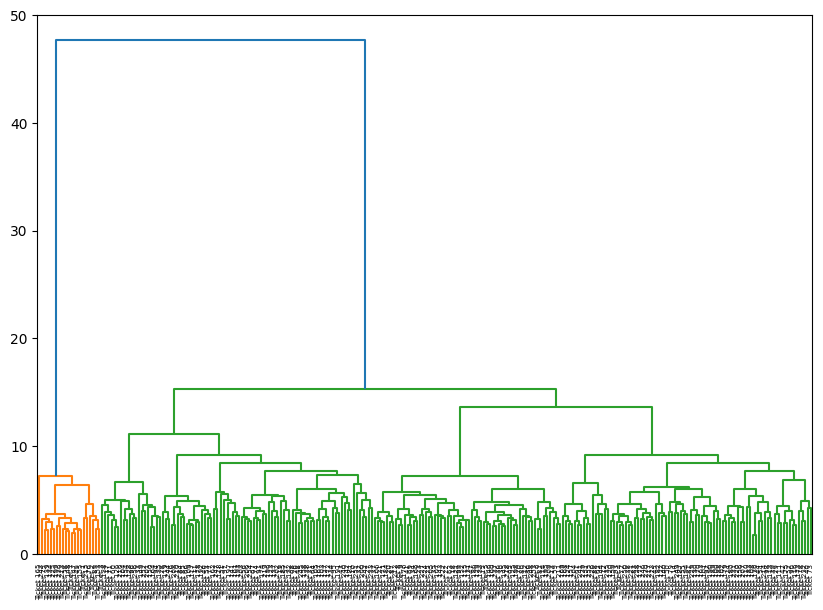

In [32]:
# TEST VERSIONfrom transformers import AutoTokenizer, AutoModel
import torch
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer, AutoModel, AutoModelForSeq2SeqLM


# Assuming df is your DataFrame
# Load pre-trained model tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Function to get embeddings
def get_bert_embeddings(texts):
    model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():
        embeddings = []
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
            outputs = model(**inputs)
            # Use mean pooling for sentence-level embeddings
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy())
    return embeddings

# Generate embeddings from your DataFrame's 'reworked_information' column
embeddings = get_bert_embeddings(df['reworked_information'].tolist())

# Perform hierarchical clustering
Z = linkage(embeddings, 'ward')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(10, 7))
# Use DataFrame index or a specific identifier column if you prefer
ticket_labels = [f'Ticket {i+1}' for i in range(len(df))]
dendrogram(Z, labels=ticket_labels)
plt.show()


In [ ]:
df.head()

,issue_id,all_information,reworked_information,cluster_label
0,116163,KEN mobile App aufschalten Einfach mal alle Module freischalten LDAP ou und upn sind jetzt vorhanden,The request is to enable the KEN mobile app and unlock all modules. The LDAP attributes ou and upn are now available.,1
1,116538,"Fwd MBA 1128639 AW Druckereinstellungen Sekretariat KFR Hallo Seit der Umstellung auf Leunet hat die KFR Schwierigkeiten beim Drucken mit dem Drucker Canon ImageRunner Advance C5560i, IP 10.95.36.110 Die Probleme treten nur in der VDI auf. Jedes Mal, wenn sie drucken wollen, m ssen sie zuerst den Drucker in der Liste anw hlen, da dieser nicht als Standard eingestellt ist und es m ssen auch alle weiteren Einstellungen wie einseitig drucken neu ausgew hlt werden. Ausserdem druckt es immer nur ein Exemplar aus, auch wenn man die Anzahl der Exemplare anpasst. Das Papierfach wird ebenfalls willk rlich ausgew hlt. Habt ihr eine Idee wie man das beheben k nnte? Ihr k nnt gerne etwas versuchen und wir testen das dann. Falls ihr noch mehr Infos ben tigt, dann liefere ich diese gerne nach. Danke! VG Max Ist der Drucker in der Tabelle eingetragen?","Summary of Technical Support Ticket:\n\nThe KFR department is experiencing printing issues with the Canon ImageRunner Advance C5560i printer after transitioning to Leunet. The problems occur only in the VDI environment. Each time they want to print, they have to manually select the printer in the list as it is not set as the default, and they also have to adjust all other settings such as one-sided printing. Additionally, it only prints one copy regardless of the specified quantity, and the paper tray selection is random. The user is seeking a solution to these issues and is open to trying out any suggestions. Further information can be provided if needed. The question at the end inquires if the printer is listed in the table.",1
2,116543,"MBA 1128940 Zimbra St rung komplette Schule E Mails senden und empfangen kslzh.ch funktioniert nicht Guten Morgen allerseits Schule KSLZH Melder Laszlo Cseri Problem Zimbra Wir kslzh.ch k nnen keine E Mails senden auch Mails von GMX und icloud.com versendet und empfangen. Im Webmail erhalten wir folgende Hinweise beim versenden von E Mails !clipboard 202403250751 h8l4i.png! !clipboard 202403250751 h6e8a.png! Eine berpr fung mit MXToolbox zeigt bei einem SMTP Check folgendes an !clipboard 202403250751 2pdnb.png! D rfen wir euch bitten, das Problem sofort zu beheben? Nachtrag Bei meinen Recherchen habe ich festgestellt, dass es auch die stud.kslzh.ch Domain auch betrifft !clipboard 202403250752 fxdsc.png! Servicedesk Ich habe eine Test Mail erfolglos gesendet. Von Zimbra an andreas.stoessel mba.zh.ch !clipboard 202403250810 kmwuh.png!","Zimbra der Schule KSLZH funktioniert nicht korrekt, da keine E-Mails von kslzh.ch sowie von GMX und icloud.com gesendet und empfangen werden können. Beim Versenden von E-Mails im Webmail erscheinen Fehlermeldungen. Eine Überprüfung mit MXToolbox zeigt Probleme bei einem SMTP Check. Es wird darum gebeten, das Problem sofort zu beheben. Der Melder hat auch festgestellt, dass die Domain stud.kslzh.ch betroffen ist. Ein Servicedeskmitarbeiter hat eine Test-E-Mail erfolglos an andreas.stoessel@mba.zh.ch gesendet.",1
3,116550,"MBA 1127156 Layout Anpassung auf Typo 3 Webseite KWI Guten Morgen Ich habe eine eher spezielle Anfrage von der Kantonsschule Wiedikon. Die Kantonsschule Wiedikon w nscht eine Layout Anpassung f r mobile Ger te zu machen f r das Video welches auf der Webseite der KWI Baustand der Hohlstrasse hochgeladen wurde. Die Kontaktperson bei fr heren Anpassungen bei euch war Noemi Schmid. Die Schule w nscht nun eine Kontaktaufnahme von euch mit Herrn Philippe da Silva Wong, Tel. 044 457 71 53 um die Einzelheiten zu besprechen. W re eine Kontaktaufnahme seitens von euch m glich? Dieses Ticket eilt ein wenig da es schon l nger auf eine Antwort wartet. Ich habe das Ticket am 27.02.2024 an euch weitergeleitet ohne R ckmeldung bis

In [33]:
### how many clusters do we have after the hierarchical clusteirng?
from scipy.cluster.hierarchy import fcluster
import numpy as np

# Assuming 'Z' is your linkage matrix from hierarchical clustering
# Specify the maximum cophenetic distance (this is an example value; adjust based on your dendrogram)
max_distance = 10

# Obtain the cluster labels
cluster_labels = fcluster(Z, max_distance, criterion='distance')

# Add the cluster labels to your DataFrame
df['cluster_label'] = cluster_labels

# Count the unique cluster labels
num_clusters = np.unique(cluster_labels).size

print(f"Number of clusters formed: {num_clusters}")


Number of clusters formed: 5


In [34]:
from transformers import AutoTokenizer, pipeline

# Load tokenizer and summarization model
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer=tokenizer)

def windowed_summarization(text, chunk_max_length=1020, stride=200, final_max_length=50):
    """
    Summarize text by dividing it into manageable chunks based on tokens,
    then summarizing each chunk and combining the summaries. Finally, summarize the combined
    summary to ensure it is concise.

    :param text: The input text to summarize.
    :param chunk_max_length: The maximum token length for each text chunk.
    :param stride: The overlap between chunks.
    :param final_max_length: The maximum token length for the final summary.
    :return: The final summarized text.
    """
    # Tokenize the entire text and split into chunks with overlap
    input_ids = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=None).squeeze()
    total_length = input_ids.size(0)
    chunk_summaries = []

    # Iterate over the tokenized input in chunks
    for i in range(0, total_length, chunk_max_length - stride):
        chunk_input_ids = input_ids[i:i+chunk_max_length]
        chunk_text = tokenizer.decode(chunk_input_ids, skip_special_tokens=True)

        # Summarize the chunk
        try:
            summary = summarizer(chunk_text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
            chunk_summaries.append(summary)
        except Exception as e:
            print(f"Error summarizing chunk starting at token {i}: {e}")

    # Combine the summaries of all chunks into a final summary
    combined_summary = " ".join(chunk_summaries)

    # Further summarize the combined summary to ensure it's not too long
    try:
        final_summary = summarizer(combined_summary, max_length=final_max_length, min_length=30, do_sample=False)[0]['summary_text']
    except Exception as e:
        print(f"Error in final summarization: {e}")
        final_summary = combined_summary  # Fallback to combined summary if error occurs

    return final_summary


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [41]:


def gpt_3_5_turbo_windowed_summarization(text, chunk_max_length=800, stride=200, final_max_length=150):
    """
    Summarize text using the GPT-3.5-turbo model's chat completion endpoint.
    """
    # Break the text into chunks
    chunks = [text[i:i+chunk_max_length] for i in range(0, len(text), chunk_max_length - stride)]
    chunk_summaries = []

    # Summarize each chunk
    for chunk in chunks:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "system", "content": "You are a helpful assistant. Summarize the following text."},
                      {"role": "user", "content": chunk}]
        )
        summary = response['choices'][0]['message']['content']
        chunk_summaries.append(summary)

    # Combine the summaries of all chunks
    combined_summary = " ".join(chunk_summaries)

    # Summarize the combined summaries to ensure conciseness
    final_response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant. Provide a concise summary of the following combined summaries."},
                  {"role": "user", "content": combined_summary}]
    )
    final_summary = final_response['choices'][0]['message']['content']

    return final_summary



In [42]:
import pandas as pd

# Assuming 'df' is your original DataFrame with 'reworked_information' and 'cluster_label' columns

# Initialize your summarization function and models here
# from transformers import AutoTokenizer, pipeline
# tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')
# summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer=tokenizer)
# def windowed_summarization(text, chunk_max_length=1020, stride=200, final_max_length=50):
    # Your function definition

# Create a new DataFrame for summaries with unique cluster labels
unique_clusters = df['cluster_label'].unique()
df_summaries = pd.DataFrame(unique_clusters, columns=['cluster_label'])
df_summaries['summary'] = "NIX"  # Initialize the 'summary' column with a placeholder

for cluster_num in df['cluster_label'].unique():
    # Extract texts for the current cluster and combine them
    cluster_texts = df[df['cluster_label'] == cluster_num]['reworked_information'].tolist()
    combined_text = " ".join(cluster_texts)
    print("******** ", cluster_num, " ******* TOTAL TEXT")
    print(combined_text)

    # Summarize the combined text
    # summary = windowed_summarization(combined_text)
    summary = gpt_3_5_turbo_windowed_summarization(combined_text)

    # Correctly update the 'summary' in df_summaries for the current cluster_label
    # We find the row where 'cluster_label' matches cluster_num and update the 'summary' for that row
    df_summaries.loc[df_summaries['cluster_label'] == cluster_num, 'summary'] = summary

    print("*************** CLUSTER NUM ************: ", cluster_num)
    print(summary)  # Optionally print the summary for verification
    print("\n")


********  1  ******* TOTAL TEXT
Zusammenfassung der Tickets:  
- Die KEN Mobile App soll konfiguriert werden, um alle Module freizuschalten.  
- Der Benutzerwechsel funktioniert nun, allerdings benötigen die KEN-Benutzer einen LDAP-Account für das aktuelle Login. Das Einloggen über ihren Azure Tenant wird erst mit Version 1.8 möglich sein.  
- LDAP ou und upn sind mittlerweile vorhanden. Der Benutzer benötigt Unterstützung bei der Einrichtung eines Signage-Systems mit einem Raspberry Pi. Der Raspberry Pi wurde erfolgreich eingerichtet und mit KEN verbunden. Der Benutzer bittet um ein Beispiel oder eine Anleitung, um das System in Betrieb zu nehmen. Zusammenfassung:

Ein Benutzer hat festgestellt, dass die Notenexportfunktion nur die Standardperiode berücksichtigt und möchte, dass auch das Semester ausgewählt werden kann. Es wird um eine Aufwandschätzung für diese Anpassung gebeten. Der ICT-Applikationsmanager schätzt den Aufwand als relativ hoch ein, da es sich um ein ganzes Modul hand

issue_id  \
0   116163   
1   116164   
2   116165   
3   116166   
4   116167   
5   116168   
6   116169   
7   116172   
8   116173   
9   116175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [44]:
df_summaries.head()

,cluster_label,summary
0,1,"Die Zusammenfassungen umfassen Konfigurationsanpassungen für die KEN Mobile App, die Notenexportfunktion, Hilfe bei der Einrichtung eines Signage-Systems, Probleme mit der Übernahme von Einstellungen und Rollen, Erweiterung des Zugriffs auf Office 365-Konten, Probleme mit Konfigurationseinstellungen, und die Lösung von Problemen mit E-Mails, Playlisten, und ein Intranet-Hacking-Versuch. Es wurden auch Maßnahmen zur Bereinigung von Backups implementiert."
1,2,"The texts involve various technical support ticket requests related to system module activation, configuration, access setup, and user management. Issues include Zimbra system updates, network connectivity, user access, and database entries for timetable management. Specific requests include setting up modules, user access to systems like KEN Stage, resolving system access errors, connecting schools to networks, and managing profiles for timetable input. Additionally, there are requests for setting up new profiles, initiating invoices, and making website layout adjustments. Multiple contacts are mentioned, with urgency highlighted for prompt responses to resolve the reported issues."
2,5,"Users are experiencing various technical issues across multiple systems. Problems include issues with deleting or striking through blocks in the KST system, difficulties with accessing systems due to login problems, errors in .dot files, challenges with RAM allocation, and troubles with syncing Zimbra and Outlook. Additionally, there are reports of email delivery failures, problems with dispensation tools, issues with user access controls, and concerns about security vulnerabilities. Collaboration with technical support teams and further investigations are required to address these issues effectively."
3,4,"The technical support tickets involve issues with the IU Stundenplantool, particularly related to the deletion of lessons marked as ""busy,"" difficulties in printing in A3 format on specific printers, recurring problems with printing settings not saving overnight, system issues related to student absences and exclusion requests, discrepancies in reported student absences, the deactivation process in EcoWeb, missing grades, and problematic data imports. The tickets cover a wide range of technical challenges in various educational processes, such as grade handling, timetable management, printer configurations, and student record management."
4,3,"Issues and requests related to technical support tickets include insufficient storage space on server SMBA10108, investigation of temporary space increase, and potential resizing of drives. Requests for technical assessments initiated by the IT team were forwarded by Stefan Widmer and Kaan Oezsoy. Temporary resolutions, like increasing storage space, have been implemented. Concerns regarding backups and login access for servers were raised. Additional support tickets involve login credential issues for employees, issues with Crystal Reports and SQL Yog access in VDI environments, and concerns about permissions and difficulties in deleting a calendar from Zimbra Outlook. Changes in usernames, email addresses, and system configurations have been successfully completed. Troubleshooting efforts have been made to address persistent scan failures, permission issues, and various technical complexities across different systems and environments. The request for setting up NAM functionality, synchronization issues, and permissions adjustments have been addressed, alongside tasks involving Balloon environments, Intranet document synchronization, and system configurations. Requests for redesigning processes, setting up new features, resolving login and access issues, and adjusting permissions and configurations have been highlighted. Challenges related to password changes, system configurations, and technical adjustments have been tackled through temporary solutions and manual interventions. Additional issues were reported rega

In [45]:
# Now create the labels out of the summarized clusters
cluster_labels = {}

def generate_label_for_summary(summary):
    conversation = [
        {"role": "system", "content": "You are a highly capable technical consultant."},
        {"role": "user", "content": f"Create 3 one-word-labels, that describes the following summary: {summary}"}
    ]

    try:
        # Call to OpenAI's GPT-3.5 Turbo API using the ChatCompletion endpoint
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=conversation,
            max_tokens=40,  # Adjust based on desired label length
            temperature=0.3  # A lower temperature for more deterministic output
        )
        label = response['choices'][0]['message']['content'].strip()
        return label
    except Exception as e:
        print(f"Error generating label: {e}")
        return "Label generation error"

# Iterate over the DataFrame and generate labels for each summary
for index, row in df_summaries.iterrows():
    summary = row['summary']
    label = generate_label_for_summary(summary)
    df_summaries.at[index, 'label'] = label

df_summaries.head()

,cluster_label,summary,label
0,1,"Die Zusammenfassungen umfassen Konfigurationsanpassungen für die KEN Mobile App, die Notenexportfunktion, Hilfe bei der Einrichtung eines Signage-Systems, Probleme mit der Übernahme von Einstellungen und Rollen, Erweiterung des Zugriffs auf Office 365-Konten, Probleme mit Konfigurationseinstellungen, und die Lösung von Problemen mit E-Mails, Playlisten, und ein Intranet-Hacking-Versuch. Es wurden auch Maßnahmen zur Bereinigung von Backups implementiert.",1. Konfiguration\n2. Problemlösung\n3. Sicherheit
1,2,"The texts involve various technical support ticket requests related to system module activation, configuration, access setup, and user management. Issues include Zimbra system updates, network connectivity, user access, and database entries for timetable management. Specific requests include setting up modules, user access to systems like KEN Stage, resolving system access errors, connecting schools to networks, and managing profiles for timetable input. Additionally, there are requests for setting up new profiles, initiating invoices, and making website layout adjustments. Multiple contacts are mentioned, with urgency highlighted for prompt responses to resolve the reported issues.",1. Support\n2. Configuration\n3. Management
2,5,"Users are experiencing various technical issues across multiple systems. Problems include issues with deleting or striking through blocks in the KST system, difficulties with accessing systems due to login problems, errors in .dot files, challenges with RAM allocation, and troubles with syncing Zimbra and Outlook. Additionally, there are reports of email delivery failures, problems with dispensation tools, issues with user access controls, and concerns about security vulnerabilities. Collaboration with technical support teams and further investigations are required to address these issues effectively.",1. Multifaceted\n2. Complex\n3. Collaborative
3,4,"The technical support tickets involve issues with the IU Stundenplantool, particularly related to the deletion of lessons marked as ""busy,"" difficulties in printing in A3 format on specific printers, recurring problems with printing settings not saving overnight, system issues related to student absences and exclusion requests, discrepancies in reported student absences, the deactivation process in EcoWeb, missing grades, and problematic data imports. The tickets cover a wide range of technical challenges in various educational processes, such as grade handling, timetable management, printer configurations, and student record management.",1. Multifaceted\n2. Diverse\n3. Complex
4,3,"Issues and requests related to technical support tickets include insufficient storage space on server SMBA10108, investigation of temporary space increase, and potential resizing of drives. Requests for technical assessments initiated by the IT team were forwarded by Stefan Widmer and Kaan Oezsoy. Temporary resolutions, like increasing storage space, have been implemented. Concerns regarding backups and login access for servers were raised. Additional support tickets involve login credential issues for employees, issues with Crystal Reports and SQL Yog access in VDI environments, and concerns about permissions and difficulties in deleting a calendar from Zimbra Outlook. Changes in usernames, email addresses, and system configurations have been successfully completed. Troubleshooting efforts have been made to address persistent scan failures, permission issues, and various technical complexities across different systems and environments. The request for setting up NAM functionality, synchronization issues, and permissions adjustments have been addressed, alongside tasks involving Balloon environments, Intranet document synchronization, and system configurations. Requests for redesigning processes, setting up new features, resolving login and access issues, and adjusting permissions and configurations have been highlighted. Challenges 